# Kazakh Layouts Development

I decided to develop a Kazakh layout with the same method used for Russian.

In [1]:
from lib import Corpus, Keyboard, Layout, Result, STANDARD_KBD, std_key_shape, STD_EXTRA_KEYS, ERGODOX, compare
import pandas as pd

Text source: [qazcorpora.kz](https://qazcorpora.kz/).

## Position Penalties

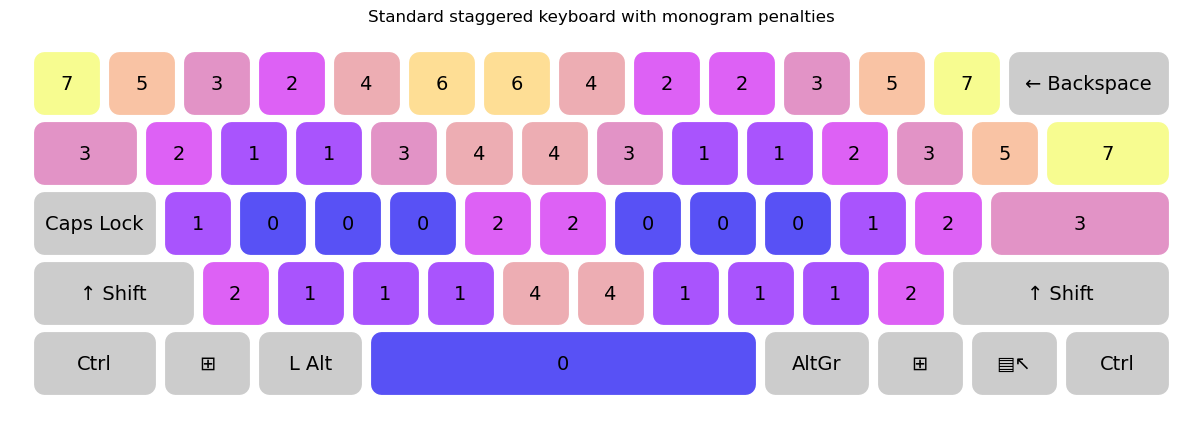

In [2]:
_ = STANDARD_KBD.display()

In [3]:
KZ_LETTERS = {
#     'vh': 'аоыұия',
#     'vs': 'әеөіү',
#     'vf': 'эю',
    'v': 'аоыұияәеёөіүэю',
    'c': 'бвгғджзкқлмнңпрстуфхһцчшщъьй'
}
KZ = Corpus.from_path('kazak.txt', types=KZ_LETTERS)

In [4]:
# Analyzing Where Keys Gravitate to

## Inner (index finger) or outer (pinky)


In [5]:
KZ.bigrams

,bigram,num,l1,l2,t1,t2,freq
0,¶қ,92,¶,қ,-,c,0.000280
1,қа,2942,қ,а,c,v,0.008967
2,аз,1341,а,з,v,c,0.004087
3,за,943,з,а,c,v,0.002874
4,ақ,1888,а,қ,v,c,0.005754
...,...,...,...,...,...,...,...
1860,чы,1,ч,ы,c,v,0.000003
1861,тᾱ,1,т,ᾱ,c,-,0.000003
1862,ᾱн,1,ᾱ,н,-,c,0.000003
1863,63,1,6,3,-,-,0.000003


,freq_out,freq_in,outer,frequency,outerness
ү,0.121915,0.000000,-0.121915,0.121915,-10000.000000
и,35.385877,1.462982,-33.922895,36.848859,-9205.955335
а,9.356989,3.657455,-5.699534,13.014444,-4379.391101
ұ,0.457182,0.304788,-0.152394,0.761970,-2000.000000
о,4.724213,5.547140,0.822927,10.271353,801.186944
е,6.400546,14.081202,7.680655,20.481748,3750.000000
ы,0.396224,1.889685,1.493461,2.285909,6533.333333
і,0.335267,3.139316,2.804049,3.474582,8070.175439
ю,0.091436,0.883885,0.792449,0.975321,8125.000000
я,0.091436,23.864894,23.773457,23.956330,9923.664122


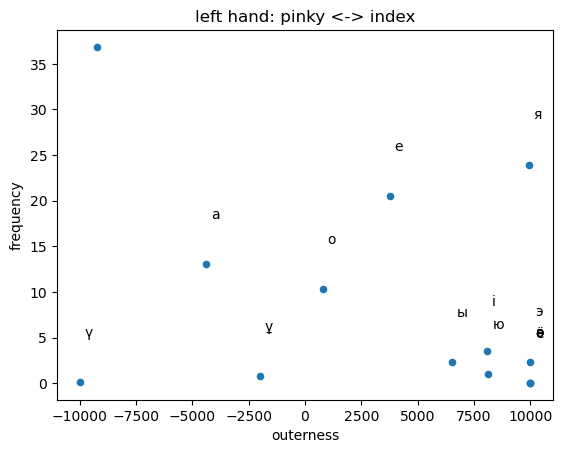

In [6]:
KZ.display_outerness("(t1 == 'v') & (t2 == 'v')", True)

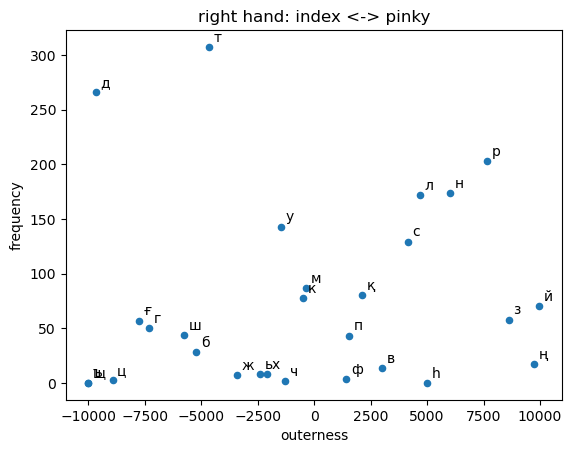

In [7]:
_ = KZ.display_outerness("(t1 == 'c') & (t2 == 'c')")

In [8]:
layouts = {
    'default': r'''
    
`12345 67890-=
→йцуке нгщшзхъ\
 фывап ролджэ¶
 ячсми тьбю.
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ұ∅үқё ңғ∅∅∅һ∅|
 ∅∅∅ә∅ ∅ө∅∅∅∅∅
 ∅∅∅∅і ∅∅∅∅/
∅
''',

    'linux': r'''
ё12345 67890-=
→йңуке нгшғзхұ\
 өықап ролджә¶
 яісми түбю.
⌴

Ё!"№;% :?*()_+
∅∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

`∅∅∅∅∅ ∅∅∅∅∅∅∅
∅∅ц∅∅ё ∅∅∅щ∅һъ/
 ф∅в∅∅ ∅∅∅∅∅э∅
 ∅ч∅∅∅ ∅ь∅∅∅
∅

''',
    
    'тест1': r'''
`12345 67890-=
→уеэюя нгцшзчф/
 ыаоий рлмсдж¶
 ъьхщв кптб.
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ұ∅үқё ңғ∅∅∅һ∅|
 ∅∅∅ә∅ ∅ө∅∅∅∅∅
 ∅∅∅∅і ∅∅∅∅/
∅
''',

    'тест2': r'''
`12345 67890-=
→уеэюя шнбцзчф/
 ыаоий грлмсж¶
 ъьхщв дкпт.
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ұ∅∅үё ∅ң∅∅∅∅∅|
 ∅ә∅і∅ ғ∅ө∅∅∅∅
 ∅∅һ∅∅ ∅қ∅∅/
∅
''',

    'тест3': r'''
ё12345 67890-=
→июяйв цдбнзчф/
 оеаы, грлмсж¶
 ъьхщэ шткпу
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

`∅∅∅∅∅ ∅∅∅∅∅∅∅
∅∅ү∅ұ∅ ∅∅∅ң∅∅∅|
 ө∅әі∅ ғ∅∅∅∅∅∅
 ∅∅һ∅∅ ∅∅қ∅∅
∅
''',
    
  'тест4': r'''
ё12345 67890-=
→юивяч бгмзжхъ/
 уеаыо ,днлрй¶
 цьщэф штксп
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅∅ .∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

`∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ү∅∅∅∅ ∅ғң∅∅һ∅|
 ұ∅әіө ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅қ∅∅
∅
''',
    

  'тест5': r'''
ё12345 67890-=
→цьовч бгмзжхъ/
 еауыю ,днлрй¶
 щэияф штксп
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅∅ .∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

`∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ө∅∅∅∅ ∅ғң∅∅һ∅|
 ∅әұіү ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅қ∅∅
∅
''',

  'тест6': r'''
ю12345 67890-=
→хоивя бгмжшзң/
 еауы, дғнлрй¶
 әұүіө птқкс
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅∅ .∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ ∅∅∅∅∅|
 э∅∅∅` ∅∅∅∅ь∅
 ∅ъ∅∅ё щч∅ц∅
∅
''',

    
  'тест7': r'''
ю12345 67890-=
→хиовя шбгмжзң/
 іыеа, ғднлрй¶
 әуұөү кқтсп
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅∅ .∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅∅∅∅∅|
 ∅∅э∅` ∅∅∅∅ь∅∅
 ∅∅ъё∅ ∅∅чц∅
∅
''',
    

  'тест8': r'''
ю12345 67890-=
→хиовя шгмбзңж/
 уыеа, ғднлрй¶
 әіұөү кқтсп
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅∅∅∅∅|
 ∅∅э∅` ∅∅∅∅∅ь∅
 ∅∅ъё∅ ∅∅чц∅
∅
''',
    

  'тест9': r'''
ю12345 67890-=
→хиовя шңқскпж/
 уыеа, ғтнлрй¶
 әіұөү гдмбз
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅ц∅∅∅|
 ∅ъё∅` ∅ч∅∅∅ь∅
 э∅∅∅∅ ∅∅∅∅∅
∅
''',


  'тест10': r'''
ю12345 67890-=
→хиовя шбқскпж/
 уыеа, ғтнлрй¶
 әіұөү гдмзң
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅ц∅∅∅|
 ∅ъё∅` ∅ч∅∅∅ь∅
 э∅∅∅∅ ∅∅∅∅∅
∅
''',


  'тест11': r'''
ю12345 67890-=
→хиовя шбқскпж/
 іыеа, ғтнлрй¶
 уұөәү гдмзң
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅һ∅∅ф∅ щ∅∅ц∅∅∅|
 ∅ъё∅` ∅ч∅∅∅ь∅
 ∅∅∅э∅ ∅∅∅∅∅
∅
''',


  'тест12': r'''
ю12345 67890-=
→өиовя жбсқкпх/
 іыеа, ғтнрлй¶
 уұшәү гдмзң
⌴

∅!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅\
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅∅∅∅ф∅ щ∅∅ц∅∅һ|
 ∅ъё∅` ∅ч∅∅∅ь∅
 ∅∅∅э∅ ∅∅∅∅∅
∅
''',
}


In [9]:
# these keys MUST be in any layout, otherwise the code throws an exception and halts
KZ_BASE = set('`-!?%*():;.,⌴¶')
for v in KZ_LETTERS.values():
    KZ_BASE |= set(v)

res = {}
for k, l in layouts.items():
    print(k, end=': ')
    res[k] = r = Result(KZ, Layout(k, l, base_keys=KZ_BASE))
    print(r.score)

default: key "/" repeated: 2
2.585910341329973
linux: key "ё" repeated: 2
key "/" repeated: 2
2.496818761622278
тест1: key "/" repeated: 2
1.7048656042047672
тест2: key "/" repeated: 2
1.4440102045520908
тест3: 1.1237470992331218
тест4: 0.9694385959519894
тест5: 0.98075120256958
тест6: 1.2085770489787764
тест7: 1.1457683382255759
тест8: 1.1142402680231753
тест9: 1.0648250318892254
тест10: 1.0591387603928137
тест11: 1.0417172539919162
тест12: 1.0416327283345372


# Standings

In [10]:
comments = {
    'default': 'ЙЦУКЕН',
    'тест1': 'simple dvorak-like improvement',
    'тест2': 'simple dvorak-like improvement',
    'тест5': 'The best Russian-based layout',
    'тест11': 'The best Kazakh-based layout'
}
print(pd.DataFrame([(k, v.score.round(3), comments[k]) for k, v in res.items() if k in comments],
        columns=['layout', 'score', 'comment']).sort_values('score', ascending=True)
    .to_markdown(index=False))

| layout   |   score | comment                        |
|:---------|--------:|:-------------------------------|
| тест5    |   0.981 | The best Russian-based layout  |
| тест11   |   1.042 | The best Kazakh-based layout   |
| тест2    |   1.444 | simple dvorak-like improvement |
| тест1    |   1.705 | simple dvorak-like improvement |
| default  |   2.586 | ЙЦУКЕН                         |


Note: all-Russian layout looks better, because the coordination efforts of using AltGr are not accounted for. But in reality, 

In [11]:
key = 'тест12'

## Heatmap

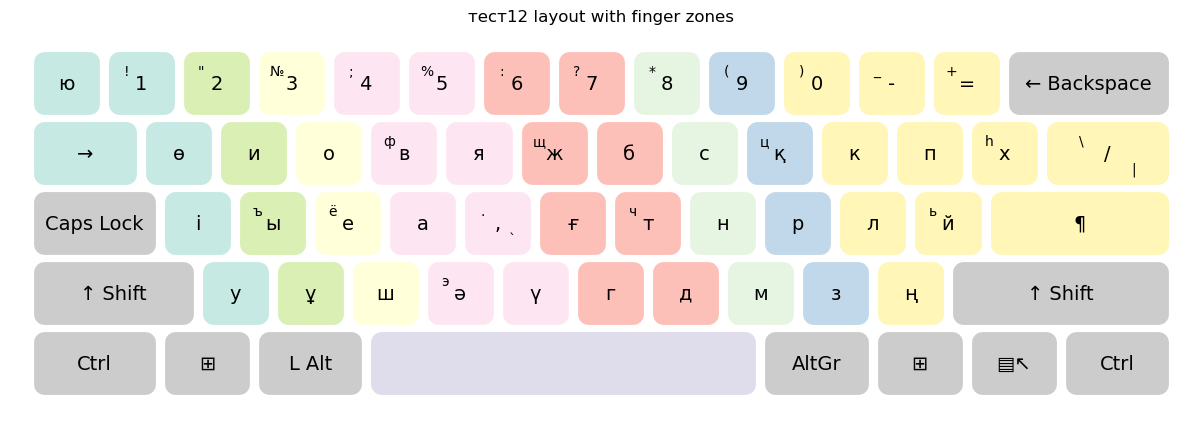

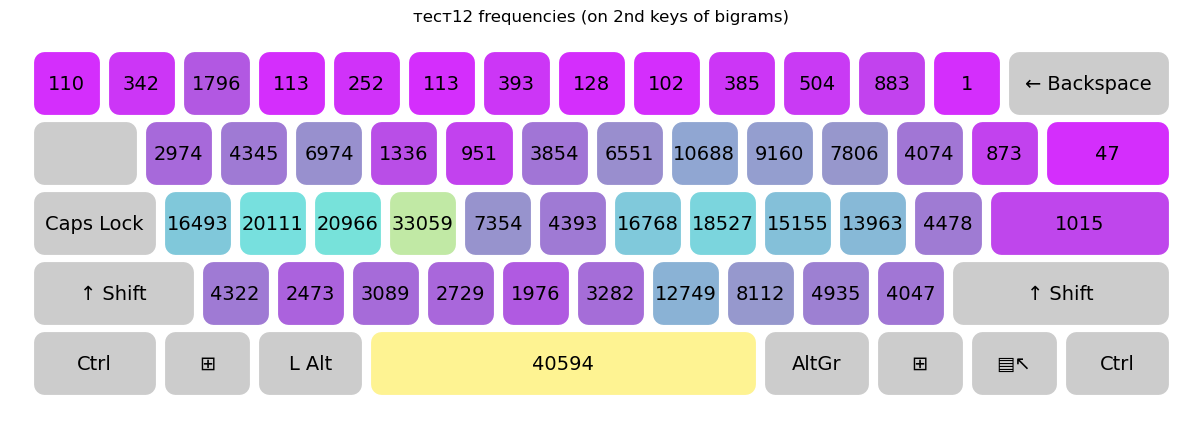

In [12]:
res[key].layout.display('finger')
res[key].display('freq')

## Arrow Maps

The less arrows, the better.

Look at the arrow maps: almost all arrows are thin, and there are few of them. QWERTY has lots of thick arrows. Colemak has noteably more than Dvorak, but the score is quite ok.

I expected Colemak to have a lot of costs on the left hand, but it has more on the right.

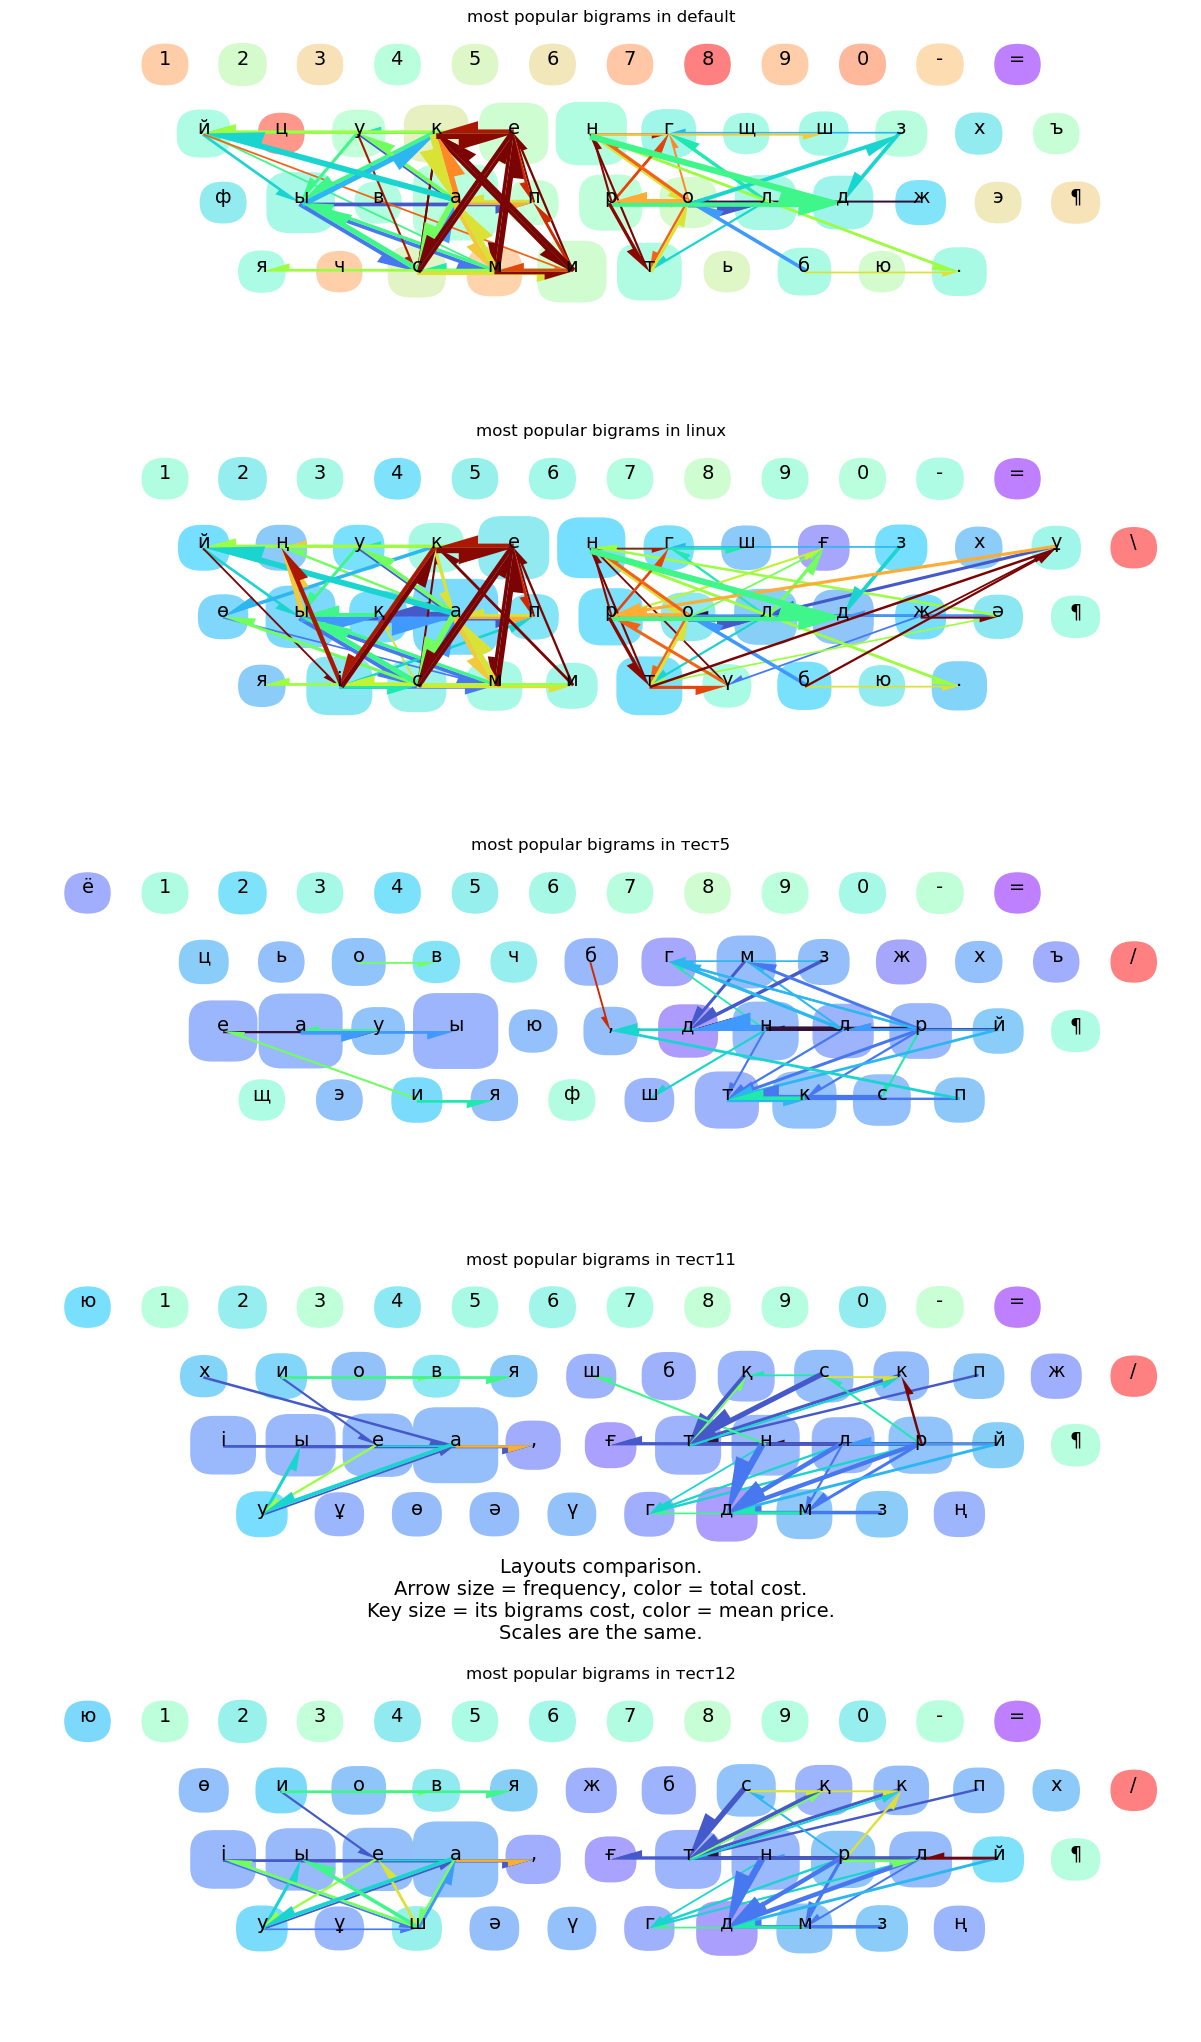

In [13]:
res['default'].combomap(res['linux'], res['тест5'], res['тест11'], res[key])

<AxesSubplot: title={'center': 'тест12'}, xlabel='finger'>

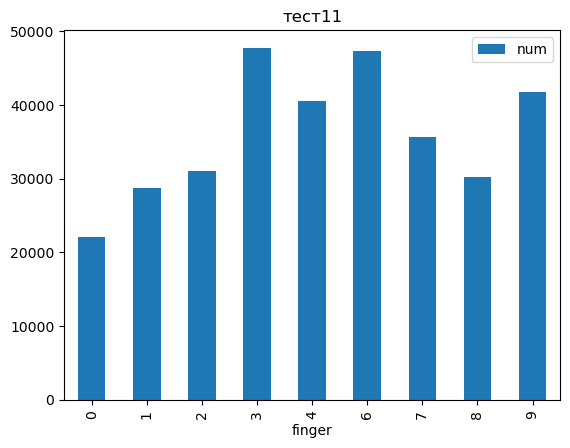

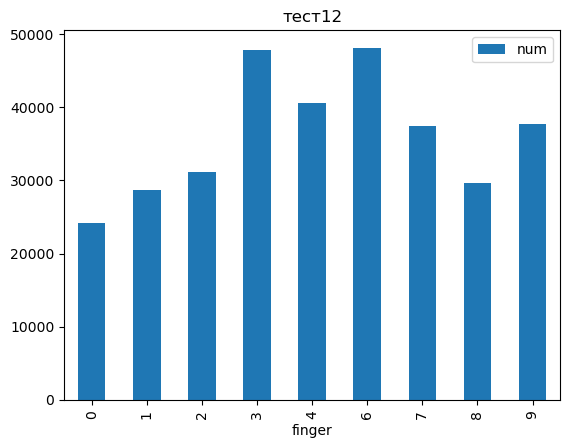

In [14]:
res['тест11'].bigrams.groupby('finger').agg({'num': 'sum'}).plot.bar(title='тест11')
res[key].bigrams.groupby('finger').agg({'num': 'sum'}).plot.bar(title=key)

In [15]:
l = 'у'
t = 'v'
KZ.bigrams[KZ.bigrams.eval(f"((t1 == '{t}') & (l2 == '{l}')) | ((l1 == '{l}') & (t2 == '{t}'))")].sort_values('num', ascending=False)

,bigram,num,l1,l2,t1,t2,freq
107,ау,987,а,у,v,c,0.003008
82,уы,585,у,ы,c,v,0.001783
158,еу,368,е,у,v,c,0.001122
69,уа,238,у,а,c,v,0.000725
460,уі,198,у,і,c,v,0.000603
335,әу,111,ә,у,v,c,0.000338
423,уе,51,у,е,c,v,0.000155
617,уә,31,у,ә,c,v,0.000094
806,яу,21,я,у,v,c,0.000064
663,иу,6,и,у,v,c,0.000018


In [16]:
res['тест9'].compare(res['тест11']).head(30)

,bigram,num,coord_cat_old,coord_cost_old,move_cost_old,move_cat_old,cost_old,coord_cat_new,coord_cost_new,move_cost_new,move_cat_new,cost_new,delta
6,⌴б,4180,space bar,0,0.5,alternating or space,4180.0,space bar,0,0.5,alternating or space,8360.0,4180.0
452,уі,198,"pinky -> ring, next row",3,0.0,ok,693.0,pinky adj row,10,0.0,ok,2079.0,1386.0
612,зб,124,"in, adj finger, same or adj row",2,1.0,ok,434.0,"over 1 finger, over 1 row",8,1.0,ok,1302.0,868.0
365,аб,672,altern hands,0,0.5,alternating or space,672.0,altern hands,0,0.5,alternating or space,1344.0,672.0
82,уы,585,"in, adj finger, same or adj row",2,0.0,ok,1170.0,"pinky -> ring, next row",3,0.0,ok,1755.0,585.0
129,ту,564,altern hands,0,0.0,alternating or space,282.0,altern hands,0,0.5,alternating or space,846.0,564.0
54,ру,526,altern hands,0,0.0,alternating or space,263.0,altern hands,0,0.5,alternating or space,789.0,526.0
107,ау,987,index -> pinky,2,0.0,ok,2467.5,index -> pinky,2,0.0,ok,2961.0,493.5
182,"у,",191,"in, over 1 finger, same row",0,0.0,ok,191.0,"in, over 1 finger, adj row",1,1.0,ok,573.0,382.0
181,лу,364,altern hands,0,0.0,alternating or space,182.0,altern hands,0,0.5,alternating or space,546.0,364.0


# Gravitation to Rows

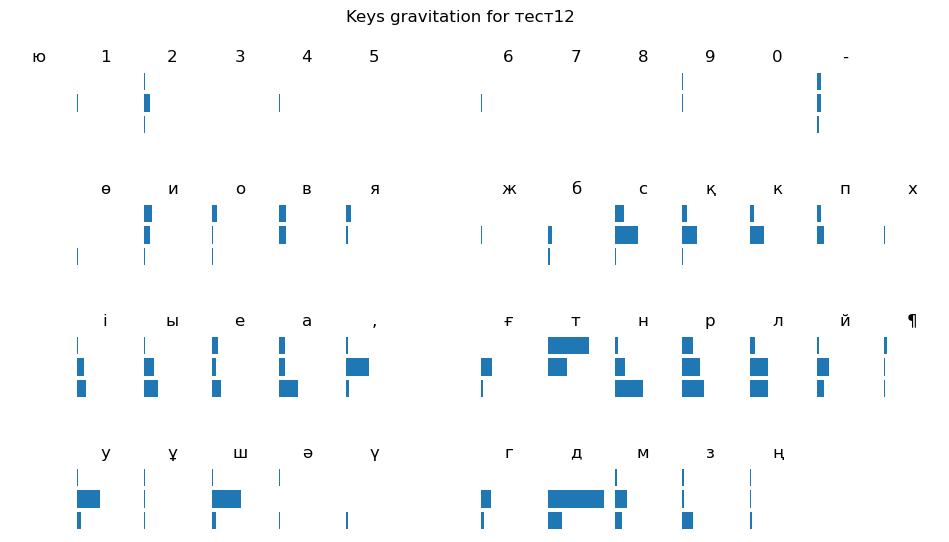

In [17]:
res[key].display('rows')

In [18]:
res['тест12'].layout.export()


default partial alphanumeric_keys
xkb_symbols "тест12" {
	include "ru(common)"
	name[Group1]= "Culebron (тест12)";
	
	key <TLDE> { [ Cyrillic_yu, Cyrillic_YU ] };
	key <AE01> { [ 1, exclam ] };
	key <AE02> { [ 2, quotedbl ] };
	key <AE03> { [ 3, numerosign ] };
	key <AE04> { [ 4, semicolon ] };
	key <AE05> { [ 5, percent ] };
	key <AE06> { [ 6, colon ] };
	key <AE07> { [ 7, question ] };
	key <AE08> { [ 8, asterisk ] };
	key <AE09> { [ 9, parenleft ] };
	key <AE10> { [ 0, parenright ] };
	key <AE11> { [ minus, underscore ] };
	key <AE12> { [ equal, plus ] };


	key <AD01> { [ Cyrillic_o_bar, Cyrillic_O_bar ] };
	key <AD02> { [ Cyrillic_i, Cyrillic_I ] };
	key <AD03> { [ Cyrillic_o, Cyrillic_O ] };
	key <AD04> { [ Cyrillic_ve, Cyrillic_VE, Cyrillic_ef, Cyrillic_EF ] };
	key <AD05> { [ Cyrillic_ya, Cyrillic_YA ] };
	key <AD06> { [ Cyrillic_zhe, Cyrillic_ZHE, Cyrillic_shcha, Cyrillic_SHCHA ] };
	key <AD07> { [ Cyrillic_be, Cyrillic_BE ] };
	key <AD08> { [ Cyrillic_es, Cyrillic_ES ] };
	k